## Comparing Disentanglement Scores for Kang - Beta Vae with C

In [ ]:

import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob, os
import matplotlib
import re

In [2]:
path='/storage/groups/ml01/workspace/harshita.agarwala/models_seurat_1000epochs'
folders = os.listdir(path=path)
folders.sort(reverse=True)
print(folders)

['latent5_alpha5_c500', 'latent5_alpha5_c40', 'latent5_alpha5_c30', 'latent5_alpha5_c20', 'latent5_alpha5_c1000', 'latent5_alpha5_c10', 'latent5_alpha50_c40', 'latent5_alpha50_c30', 'latent5_alpha50_c20', 'latent5_alpha50_c10', 'latent5_alpha500_c40', 'latent5_alpha500_c30', 'latent5_alpha500_c20', 'latent5_alpha500_c10', 'latent5_alpha20_c500', 'latent5_alpha20_c40', 'latent5_alpha20_c30', 'latent5_alpha20_c20', 'latent5_alpha20_c1000', 'latent5_alpha20_c10', 'latent5_alpha1_c500', 'latent5_alpha1_c1000', 'latent5_alpha10_c40', 'latent5_alpha10_c30', 'latent5_alpha10_c20', 'latent5_alpha10_c10', 'latent5_alpha100_c500', 'latent5_alpha100_c40', 'latent5_alpha100_c30', 'latent5_alpha100_c2000', 'latent5_alpha100_c20', 'latent5_alpha100_c1000', 'latent5_alpha100_c10', 'latent10_alpha5_c40', 'latent10_alpha5_c30', 'latent10_alpha5_c20', 'latent10_alpha5_c10', 'latent10_alpha50_c40', 'latent10_alpha50_c30', 'latent10_alpha50_c20', 'latent10_alpha50_c10', 'latent10_alpha500_c40', 'latent10_

In [3]:

z_dims = []
alphas = []
c_vals = []
age_max = []
cluster_max = []
gene_max = []
seq_max = []
age_avg = []
cluster_avg = []
gene_avg = []
seq_avg = []
max_vals = []
avg_vals = []
avg_dims = []
max_dims = []


for folder_name in folders:
    try:
        df = pd.read_csv(path+"/"+folder_name+"/4_observationkeras_linear_classifier_output_local.csv",index_col=0)
        z = re.search('latent(\d+)', folder_name)
        #df.fillna(0,inplace=True)
        #print(df)
        if int(z[1]) == 10:
            continue
        al = re.search('alpha(\d+)', folder_name)
        c = re.search('_c(\d+)', folder_name)
        z_dims.append(int(z[1]))
        alphas.append(int(al[1]))
        c_vals.append(int(c[1]))
        max_vals.append(list(df.max()))
        avg_vals.append(list(df.mean()))
        avg_dims.append(list(df.mean(axis=1)))
        max_dims.append(list(df.max(axis=1)))
    except:
        pass

In [4]:
print(alphas)
print(c_vals)


[5, 5, 5, 5, 5, 5, 50, 50, 50, 50, 500, 500, 500, 20, 20, 20, 20, 20, 20, 1, 1, 10, 10, 10, 10, 100, 100, 100, 100, 100]
[500, 40, 30, 20, 1000, 10, 40, 30, 20, 10, 40, 30, 20, 500, 40, 30, 20, 1000, 10, 500, 1000, 40, 30, 20, 10, 500, 40, 30, 20, 10]


In [8]:
avg_df = pd.DataFrame(avg_vals,columns=["Cell Type","Condition","Gene Exp","Seq Depth"])
avg_df["alphas"]=alphas
avg_df["c_vals"]=c_vals
df1 =avg_df.melt(id_vars=['alphas','c_vals'], 
              value_vars=["Cell Type","Condition","Gene Exp","Seq Depth"],
              var_name='feature', value_name='score')

In [9]:
df1

,alphas,c_vals,feature,score
0,5,500,Cell Type,0.633065
1,5,40,Cell Type,0.612266
2,5,30,Cell Type,0.594313
3,5,20,Cell Type,0.582404
4,5,1000,Cell Type,0.611283
...,...,...,...,...
115,100,500,Seq Depth,0.345192
116,100,40,Seq Depth,0.299003
117,100,30,Seq Depth,0.340126
118,100,20,Seq Depth,0.302316


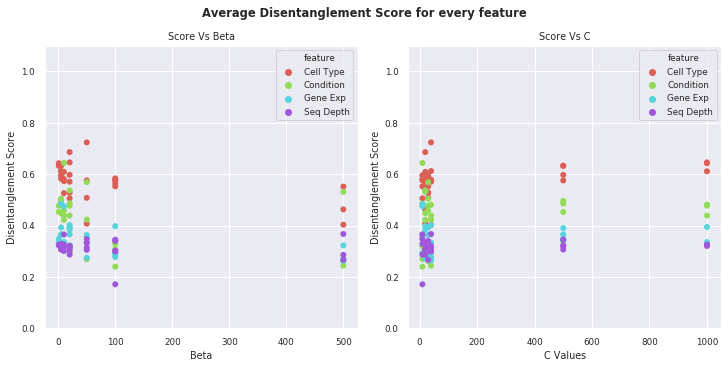

In [11]:
sns.set(font_scale=0.8)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
scatter1 = sns.scatterplot('alphas','score',legend='full',hue='feature',data=df1,
                          linewidth=0,palette=sns.color_palette('hls', n_colors=4),ax=ax[0])
scatter2 = sns.scatterplot('c_vals','score',legend='full',hue='feature',data=df1,
                          linewidth=0,palette=sns.color_palette('hls', n_colors=4),ax=ax[1])
scatter1.set_ylim([0, 1.1])
scatter2.set_ylim([0, 1.1])
scatter1.set_xlabel("Beta")
scatter2.set_xlabel("C Values")
scatter1.set_ylabel("Disentanglement Score")
scatter2.set_ylabel("Disentanglement Score")
scatter1.set_title("Score Vs Beta")
scatter2.set_title("Score Vs C")
plt.suptitle("Average Disentanglement Score for every feature",weight="bold")
#scatter2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("New_Seurat_bvae_c_ds_avg.png",bbox_inches="tight",dpi=150)

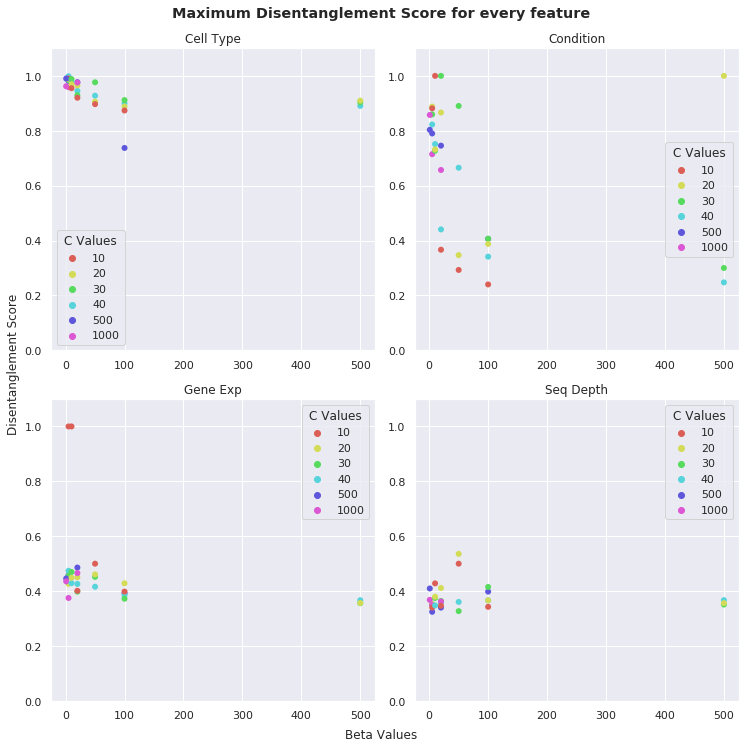

In [5]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
fig, ax = plt.subplots(2,2,figsize=(10,10),constrained_layout=True)
scatter1 = sns.scatterplot(alphas,[pt[0] for pt in max_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0,0],palette=sns.color_palette('hls', n_colors=6))
scatter2 = sns.scatterplot(alphas,[pt[1] for pt in max_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0,1],palette=sns.color_palette('hls', n_colors=6))
scatter3 = sns.scatterplot(alphas,[pt[2] for pt in max_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[1,0],palette=sns.color_palette('hls', n_colors=6))
scatter4 = sns.scatterplot(alphas,[pt[3] for pt in max_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[1,1],palette=sns.color_palette('hls', n_colors=6))

scatter1.set_title("Cell Type")
scatter2.set_title("Condition")
scatter3.set_title("Gene Exp")
scatter4.set_title("Seq Depth")
plt.suptitle("Maximum Disentanglement Score for every feature",weight="bold")

scatter1.set_ylim([0, 1.1])
scatter2.set_ylim([0, 1.1])
scatter3.set_ylim([0, 1.1])
scatter4.set_ylim([0, 1.1])
scatter1.get_legend().set_title("C Values")
scatter2.get_legend().set_title("C Values")
scatter3.get_legend().set_title("C Values")
scatter4.get_legend().set_title("C Values")

fig.text(0.5, -0.02, 'Beta Values', ha='center')
fig.text(-0.02, 0.5, 'Disentanglement Score', va='center', rotation='vertical')
plt.savefig(path+"/Max_DS_feature_5.png",bbox_inches="tight")

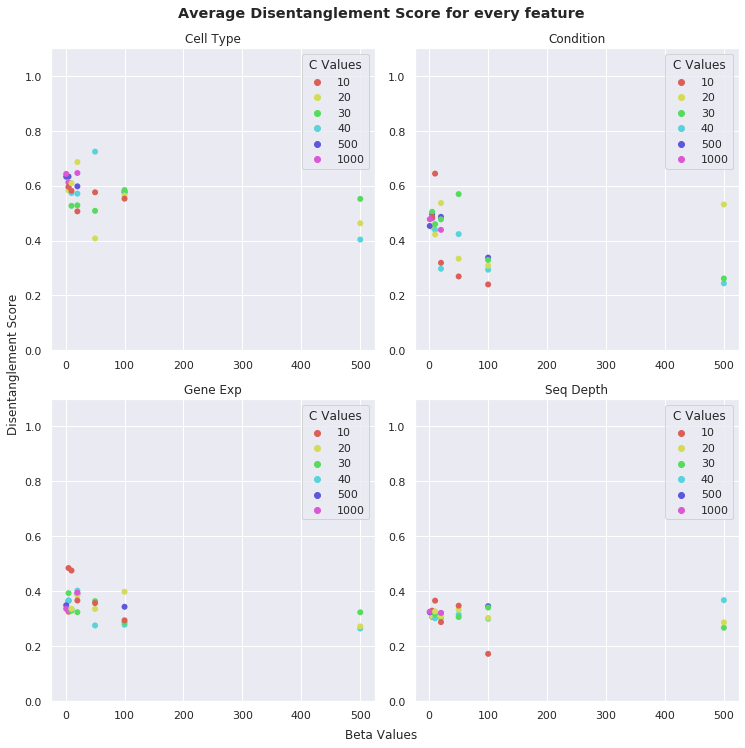

In [6]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
fig, ax = plt.subplots(2,2,figsize=(10,10),constrained_layout=True)
scatter1 = sns.scatterplot(alphas,[pt[0] for pt in avg_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0,0],palette=sns.color_palette('hls', n_colors=6))
scatter2 = sns.scatterplot(alphas,[pt[1] for pt in avg_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0,1],palette=sns.color_palette('hls', n_colors=6))
scatter3 = sns.scatterplot(alphas,[pt[2] for pt in avg_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[1,0],palette=sns.color_palette('hls', n_colors=6))
scatter4 = sns.scatterplot(alphas,[pt[3] for pt in avg_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[1,1],palette=sns.color_palette('hls', n_colors=6))

scatter1.set_title("Cell Type")
scatter2.set_title("Condition")
scatter3.set_title("Gene Exp")
scatter4.set_title("Seq Depth")
plt.suptitle("Average Disentanglement Score for every feature",weight="bold")

scatter1.set_ylim([0, 1.1])
scatter2.set_ylim([0, 1.1])
scatter3.set_ylim([0, 1.1])
scatter4.set_ylim([0, 1.1])
scatter1.get_legend().set_title("C Values")
scatter2.get_legend().set_title("C Values")
scatter3.get_legend().set_title("C Values")
scatter4.get_legend().set_title("C Values")

fig.text(0.5, -0.02, 'Beta Values', ha='center')
fig.text(-0.02, 0.5, 'Disentanglement Score', va='center', rotation='vertical')
plt.savefig(path+"/Avg_DS_feature_5.png",bbox_inches="tight")

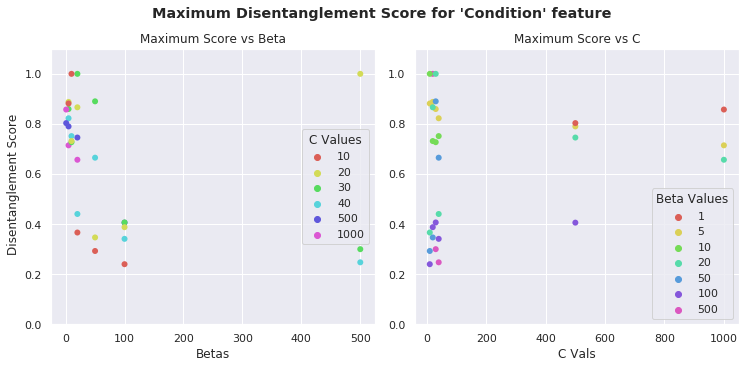

In [8]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
scatter1 = sns.scatterplot(alphas,[pt[1] for pt in max_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=6))
scatter2 = sns.scatterplot(c_vals,[pt[1] for pt in max_vals],legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=7))

scatter1.set_title("Maximum Score vs Beta")
scatter2.set_title("Maximum Score vs C")

plt.suptitle("Maximum Disentanglement Score for 'Condition' feature",weight="bold")

scatter1.set_ylim([0, 1.1])
scatter2.set_ylim([0, 1.1])
scatter1.get_legend().set_title("C Values")
scatter2.get_legend().set_title("Beta Values")
scatter1.set_xlabel("Betas")
scatter2.set_xlabel("C Vals")

fig.text(-0.02, 0.5, 'Disentanglement Score', va='center', rotation='vertical')
plt.savefig(path+"/Max_DS_cond_5.png",bbox_inches="tight")

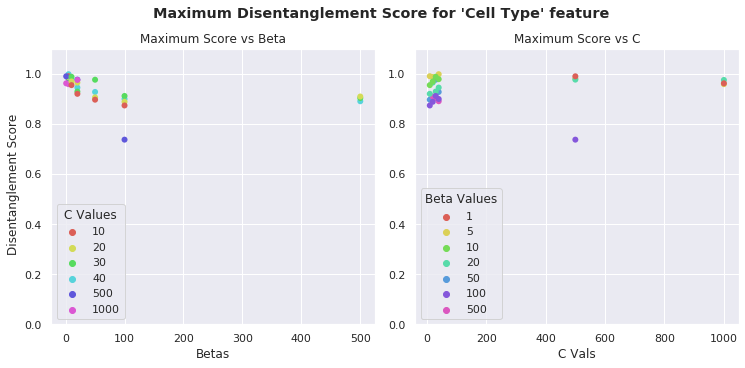

In [9]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
scatter1 = sns.scatterplot(alphas,[pt[0] for pt in max_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=6))
scatter2 = sns.scatterplot(c_vals,[pt[0] for pt in max_vals],legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=7))

scatter1.set_title("Maximum Score vs Beta")
scatter2.set_title("Maximum Score vs C")

plt.suptitle("Maximum Disentanglement Score for 'Cell Type' feature",weight="bold")

scatter1.set_ylim([0, 1.1])
scatter2.set_ylim([0, 1.1])
scatter1.get_legend().set_title("C Values")
scatter2.get_legend().set_title("Beta Values")
scatter1.set_xlabel("Betas")
scatter2.set_xlabel("C Vals")

fig.text(-0.02, 0.5, 'Disentanglement Score', va='center', rotation='vertical')
plt.savefig(path+"/Max_DS_cell_5.png",bbox_inches="tight")

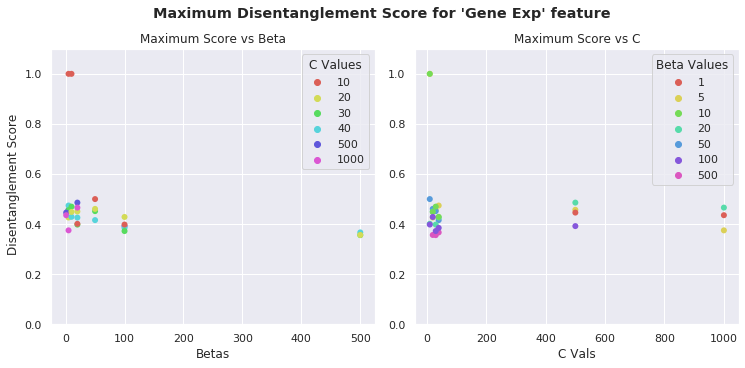

In [11]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
scatter1 = sns.scatterplot(alphas,[pt[2] for pt in max_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=6))
scatter2 = sns.scatterplot(c_vals,[pt[2] for pt in max_vals],legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=7))

scatter1.set_title("Maximum Score vs Beta")
scatter2.set_title("Maximum Score vs C")

plt.suptitle("Maximum Disentanglement Score for 'Gene Exp' feature",weight="bold")

scatter1.set_ylim([0, 1.1])
scatter2.set_ylim([0, 1.1])
scatter1.get_legend().set_title("C Values")
scatter2.get_legend().set_title("Beta Values")
scatter1.set_xlabel("Betas")
scatter2.set_xlabel("C Vals")

fig.text(-0.02, 0.5, 'Disentanglement Score', va='center', rotation='vertical')
plt.savefig(path+"/Max_DS_gene_exp_5.png",bbox_inches="tight")

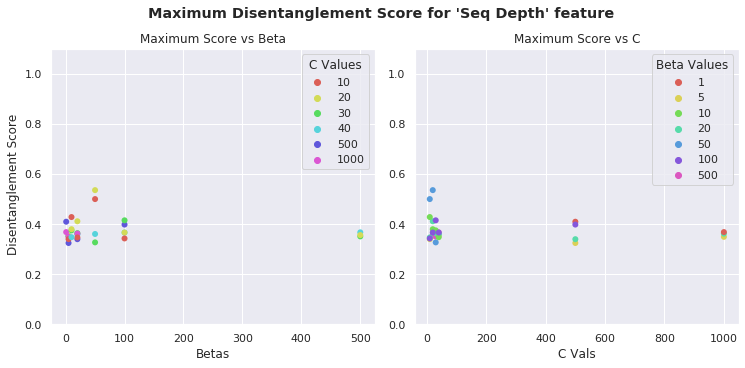

In [12]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
scatter1 = sns.scatterplot(alphas,[pt[3] for pt in max_vals],legend='full',hue=c_vals,
                          linewidth=0,ax=ax[0],palette=sns.color_palette('hls', n_colors=6))
scatter2 = sns.scatterplot(c_vals,[pt[3] for pt in max_vals],legend='full',hue=alphas,
                          linewidth=0,ax=ax[1],palette=sns.color_palette('hls', n_colors=7))

scatter1.set_title("Maximum Score vs Beta")
scatter2.set_title("Maximum Score vs C")

plt.suptitle("Maximum Disentanglement Score for 'Seq Depth' feature",weight="bold")

scatter1.set_ylim([0, 1.1])
scatter2.set_ylim([0, 1.1])
scatter1.get_legend().set_title("C Values")
scatter2.get_legend().set_title("Beta Values")
scatter1.set_xlabel("Betas")
scatter2.set_xlabel("C Vals")

fig.text(-0.02, 0.5, 'Disentanglement Score', va='center', rotation='vertical')
plt.savefig(path+"/Max_DS_seq_depth_5.png",bbox_inches="tight")